## Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset

# DATASET LINK:https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption?resource=download

In [2]:
# Load the dataset
df = pd.read_csv("D:\\SQL PROJECT\\data analytics project\\Fuel_Consumption_2000-2022.csv")

In [3]:
df

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


##  Data Pre-Processing

In [4]:
# Number of rows and columns in the dataset
print(df.shape)

(22556, 13)


In [5]:
# Display the column names  
print(df.columns)


Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')


In [6]:
# Display data type
print(df.dtypes)

YEAR                  int64
MAKE                 object
MODEL                object
VEHICLE CLASS        object
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object


In [7]:
# Checking for Unique Values
print(df.nunique())

YEAR                  23
MAKE                  87
MODEL               4242
VEHICLE CLASS         32
ENGINE SIZE           63
CYLINDERS              9
TRANSMISSION          30
FUEL                   5
FUEL CONSUMPTION     228
HWY (L/100 km)       152
COMB (L/100 km)      192
COMB (mpg)            59
EMISSIONS            358
dtype: int64


In [8]:
# Display the first 5 rows of the dataset
print(df.head())

   YEAR   MAKE    MODEL VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0  2000  ACURA    1.6EL       COMPACT          1.6          4           A4   
1  2000  ACURA    1.6EL       COMPACT          1.6          4           M5   
2  2000  ACURA    3.2TL      MID-SIZE          3.2          6          AS5   
3  2000  ACURA    3.5RL      MID-SIZE          3.5          6           A4   
4  2000  ACURA  INTEGRA    SUBCOMPACT          1.8          4           A4   

  FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  COMB (mpg)  \
0    X               9.2             6.7              8.1          35   
1    X               8.5             6.5              7.6          37   
2    Z              12.2             7.4             10.0          28   
3    Z              13.4             9.2             11.5          25   
4    X              10.0             7.0              8.6          33   

   EMISSIONS  
0        186  
1        175  
2        230  
3        264  
4        198  


In [9]:
# Display  summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB
None


In [10]:
# Display the last  5 rows of the dataset
print(df.tail())

       YEAR   MAKE        MODEL  VEHICLE CLASS  ENGINE SIZE  CYLINDERS  \
22551  2022  Volvo  XC40 T5 AWD     SUV: Small          2.0          4   
22552  2022  Volvo  XC60 B5 AWD     SUV: Small          2.0          4   
22553  2022  Volvo  XC60 B6 AWD     SUV: Small          2.0          4   
22554  2022  Volvo  XC90 T5 AWD  SUV: Standard          2.0          4   
22555  2022  Volvo  XC90 T6 AWD  SUV: Standard          2.0          4   

      TRANSMISSION FUEL  FUEL CONSUMPTION  HWY (L/100 km)  COMB (L/100 km)  \
22551          AS8    Z              10.7             7.7              9.4   
22552          AS8    Z              10.5             8.1              9.4   
22553          AS8    Z              11.0             8.7              9.9   
22554          AS8    Z              11.5             8.4             10.1   
22555          AS8    Z              12.4             8.9             10.8   

       COMB (mpg)  EMISSIONS  
22551          30        219  
22552          30       

In [11]:
# Generate descriptive statistics
print(df.describe())

               YEAR   ENGINE SIZE     CYLINDERS  FUEL CONSUMPTION  \
count  22556.000000  22556.000000  22556.000000      22556.000000   
mean    2011.554442      3.356646      5.854141         12.763513   
std        6.298269      1.335425      1.819597          3.500999   
min     2000.000000      0.800000      2.000000          3.500000   
25%     2006.000000      2.300000      4.000000         10.400000   
50%     2012.000000      3.000000      6.000000         12.300000   
75%     2017.000000      4.200000      8.000000         14.725000   
max     2022.000000      8.400000     16.000000         30.600000   

       HWY (L/100 km)  COMB (L/100 km)    COMB (mpg)     EMISSIONS  
count    22556.000000     22556.000000  22556.000000  22556.000000  
mean         8.919126        11.034341     27.374534    250.068452  
std          2.274764         2.910920      7.376982     59.355276  
min          3.200000         3.600000     11.000000     83.000000  
25%          7.300000         9.1

# Handling Missing Values

In [12]:
# Check for missing values
print(df.isnull().sum())

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64


In [13]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)
if duplicates > 0:
    df = df.drop_duplicates()
    print("\nDuplicates removed. New dimensions of the dataset:", df.shape)


Number of duplicate rows: 1

Duplicates removed. New dimensions of the dataset: (22555, 13)


#  Exploratory Data Analysis 

 Identifying and Addressing Outliers

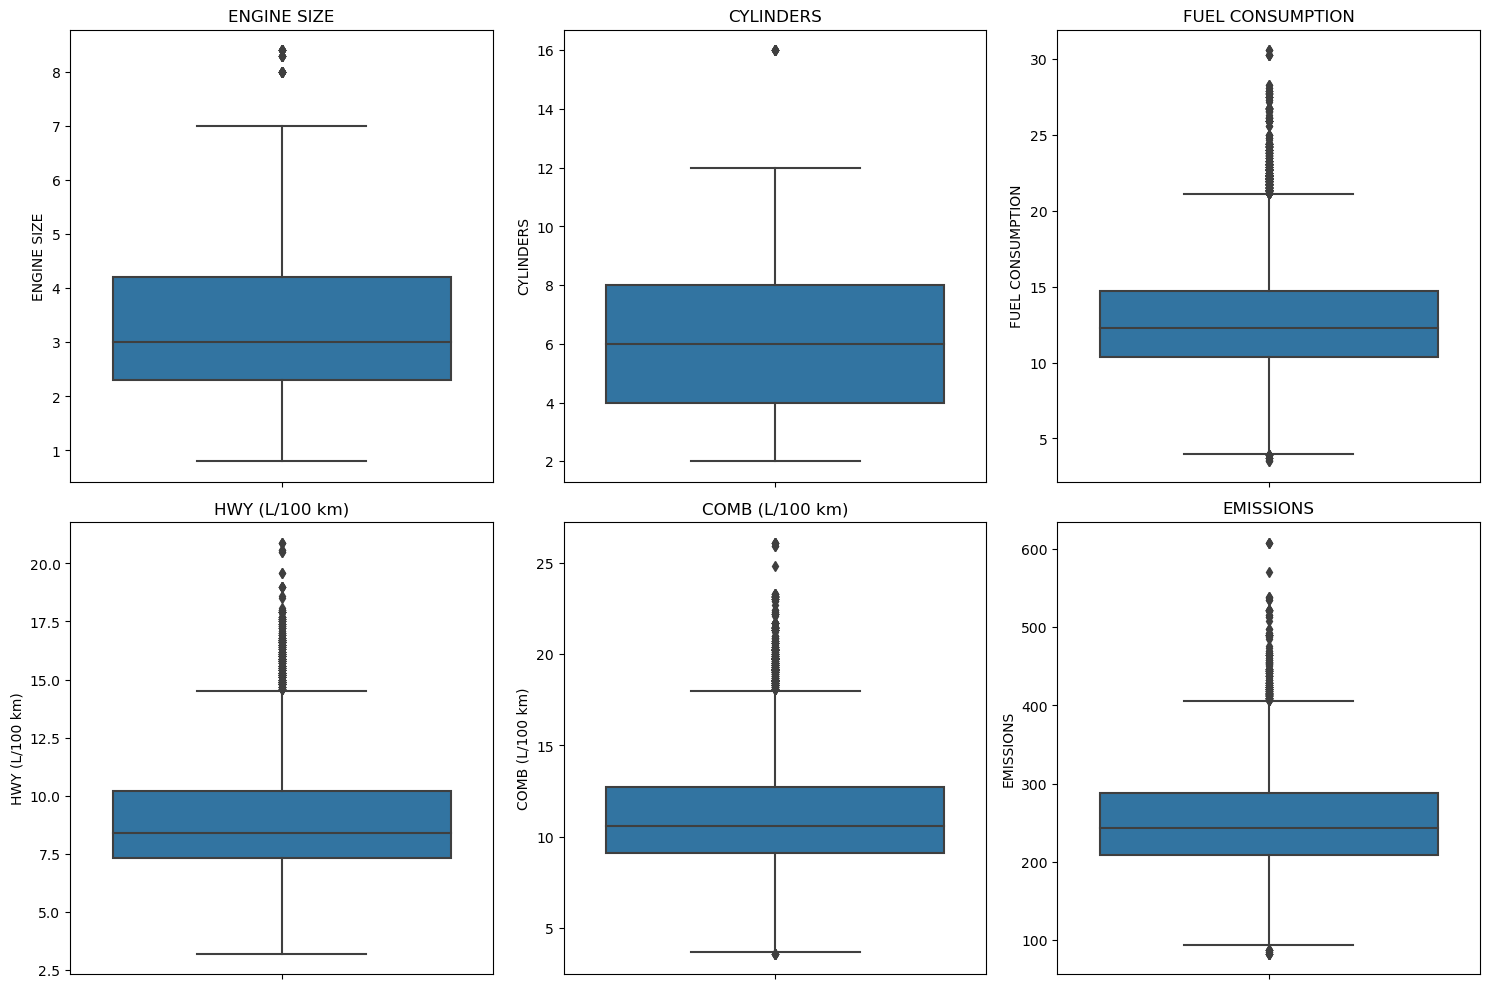

In [14]:
# Define the numerical columns
numerical_columns = ['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'HWY (L/100 km)', 'COMB (L/100 km)', 'EMISSIONS']

# Create individual box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

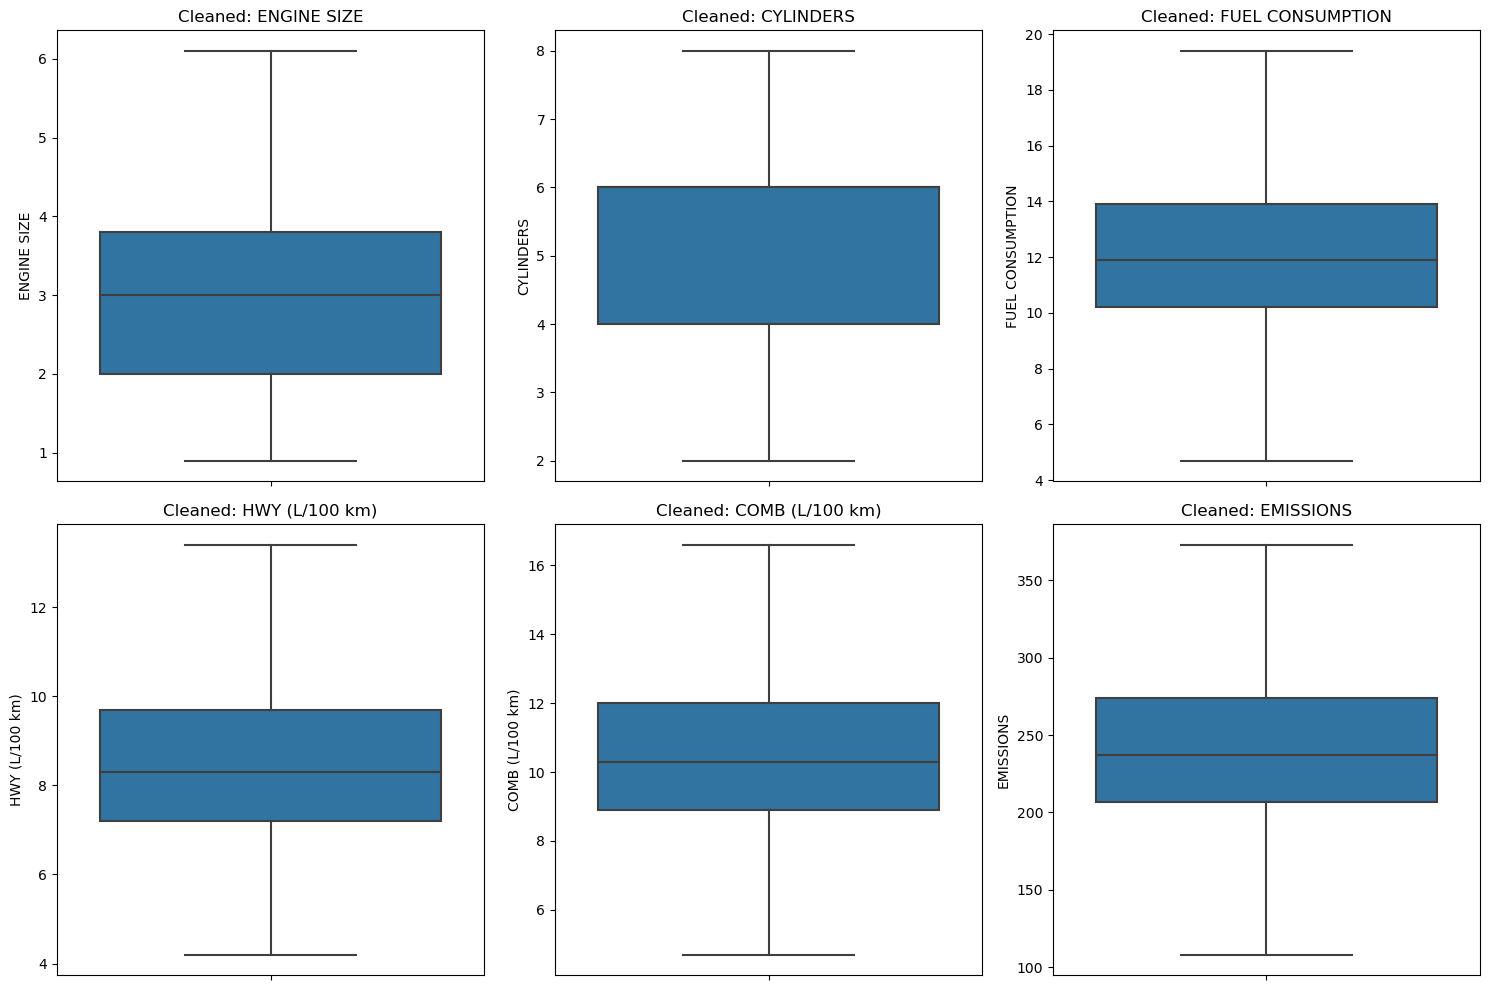

In [15]:
# Define a function to remove outliers based on IQR
def remove_outliers_iteratively(df, numerical_columns, max_iterations=5):
    df_cleaned = df.copy()
    for _ in range(max_iterations):
        for column in numerical_columns:
            Q1 = df_cleaned[column].quantile(0.25)
            Q3 = df_cleaned[column].quantile(0.75)
            IQR = Q3 - Q1
            
            # Define bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Filter out the outliers
            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    
    return df_cleaned
# Remove outliers iteratively
df_cleaned = remove_outliers_iteratively(df, numerical_columns)

# Create individual box plots for each numerical column after removing outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Cleaned: {column}')
plt.tight_layout()
plt.show()


In [16]:
# Generate summary statistics
summary_stats = df[numerical_columns].describe().T
summary_stats['median'] = df[numerical_columns].median()
# Display the summary statistics table
print(summary_stats)

                    count        mean        std   min    25%    50%    75%  \
ENGINE SIZE       22555.0    3.356617   1.335448   0.8    2.3    3.0    4.2   
CYLINDERS         22555.0    5.854046   1.819582   2.0    4.0    6.0    8.0   
FUEL CONSUMPTION  22555.0   12.763294   3.500922   3.5   10.4   12.3   14.7   
HWY (L/100 km)    22555.0    8.918958   2.274675   3.2    7.3    8.4   10.2   
COMB (L/100 km)   22555.0   11.034148   2.910839   3.6    9.1   10.6   12.7   
EMISSIONS         22555.0  250.063844  59.352558  83.0  209.0  243.0  288.0   

                    max  median  
ENGINE SIZE         8.4     3.0  
CYLINDERS          16.0     6.0  
FUEL CONSUMPTION   30.6    12.3  
HWY (L/100 km)     20.9     8.4  
COMB (L/100 km)    26.1    10.6  
EMISSIONS         608.0   243.0  


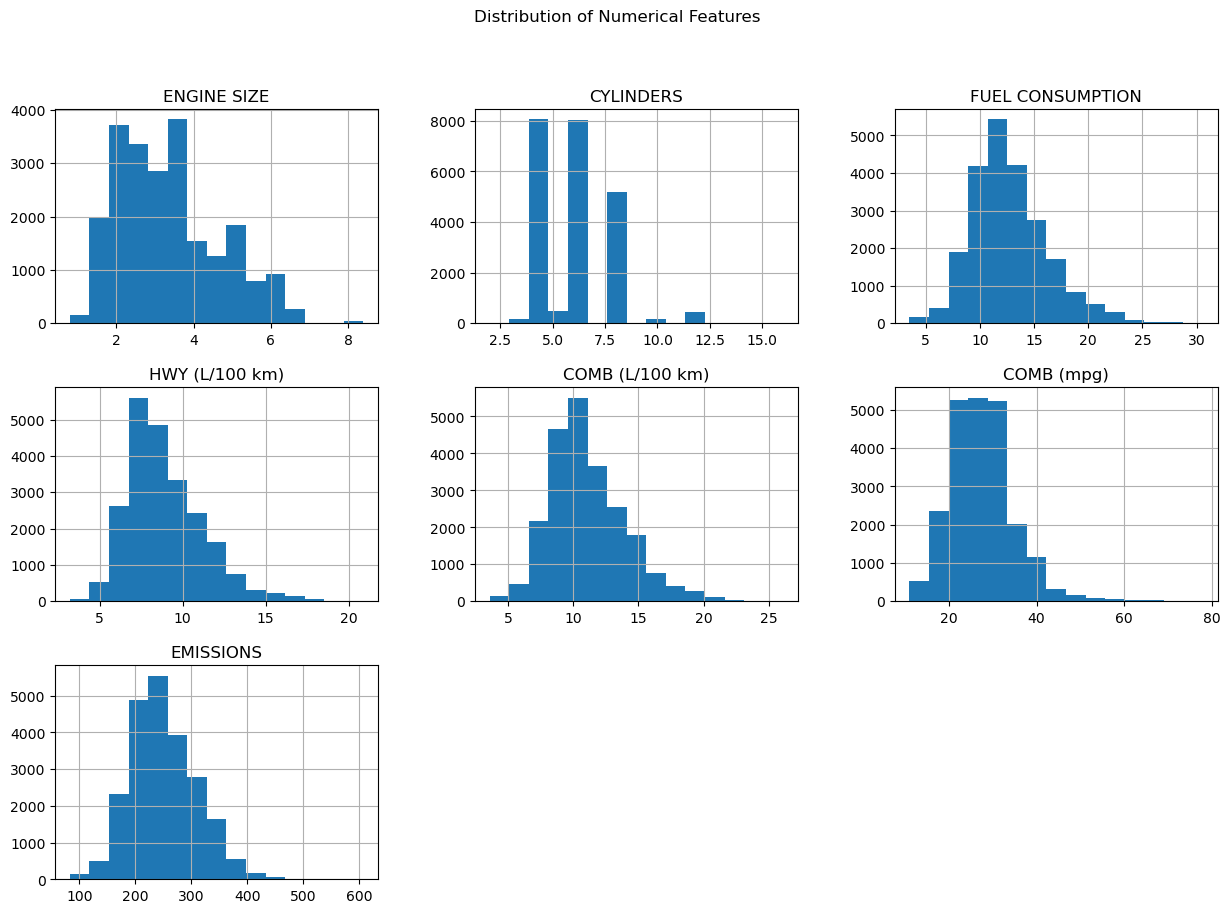

In [17]:
# Histograms for numerical features
numerical_columns = ['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'HWY (L/100 km)', 'COMB (L/100 km)', 
                     'COMB (mpg)', 'EMISSIONS']
df[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()


In [18]:
from sklearn.preprocessing import StandardScaler
# Standardize the numerical columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerical_columns]), columns=numerical_columns)

# Correlation matrix
corr_matrix = df_scaled.corr()
print(corr_matrix)




                  ENGINE SIZE  CYLINDERS  FUEL CONSUMPTION  HWY (L/100 km)  \
ENGINE SIZE          1.000000   0.913385          0.821615        0.749409   
CYLINDERS            0.913385   1.000000          0.794928        0.698321   
FUEL CONSUMPTION     0.821615   0.794928          1.000000        0.942347   
HWY (L/100 km)       0.749409   0.698321          0.942347        1.000000   
COMB (L/100 km)      0.807329   0.771571          0.992959        0.975012   
COMB (mpg)          -0.755006  -0.714196         -0.921355       -0.884736   
EMISSIONS            0.821308   0.802164          0.919094        0.894767   

                  COMB (L/100 km)  COMB (mpg)  EMISSIONS  
ENGINE SIZE              0.807329   -0.755006   0.821308  
CYLINDERS                0.771571   -0.714196   0.802164  
FUEL CONSUMPTION         0.992959   -0.921355   0.919094  
HWY (L/100 km)           0.975012   -0.884736   0.894767  
COMB (L/100 km)          1.000000   -0.920909   0.922975  
COMB (mpg)           

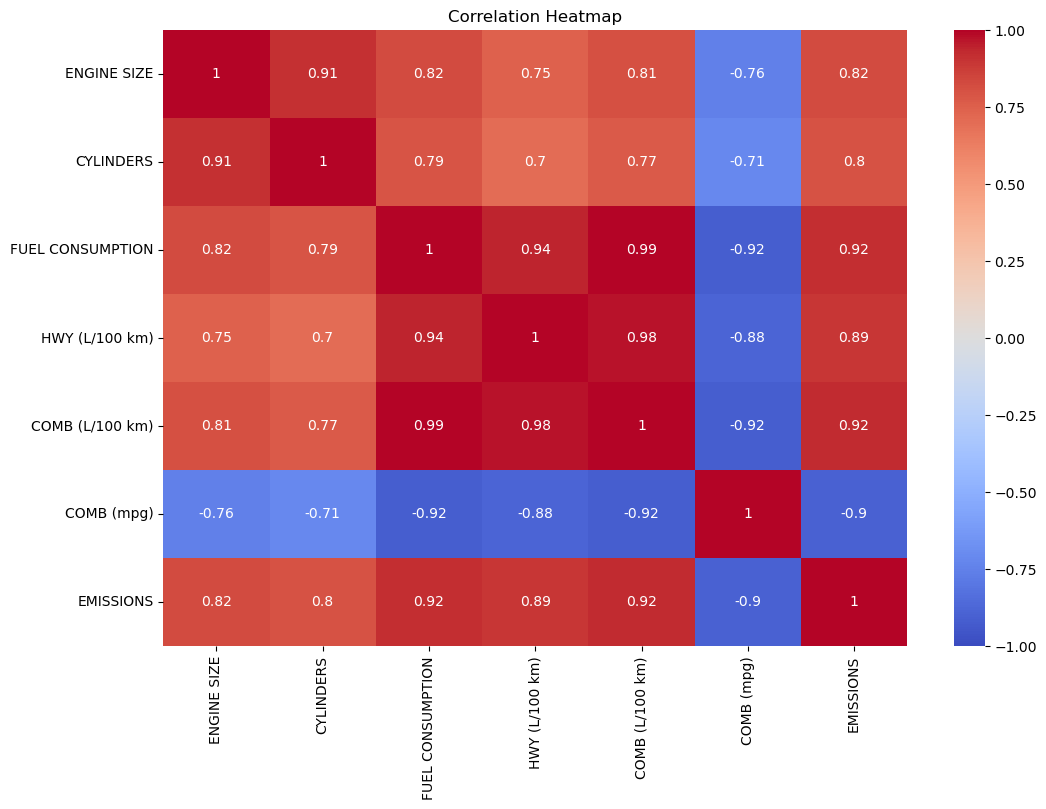

In [19]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

Skewness:
 ENGINE SIZE         0.631319
CYLINDERS           0.911443
FUEL CONSUMPTION    0.760971
HWY (L/100 km)      0.936788
COMB (L/100 km)     0.817219
COMB (mpg)          1.172822
EMISSIONS           0.534733
dtype: float64


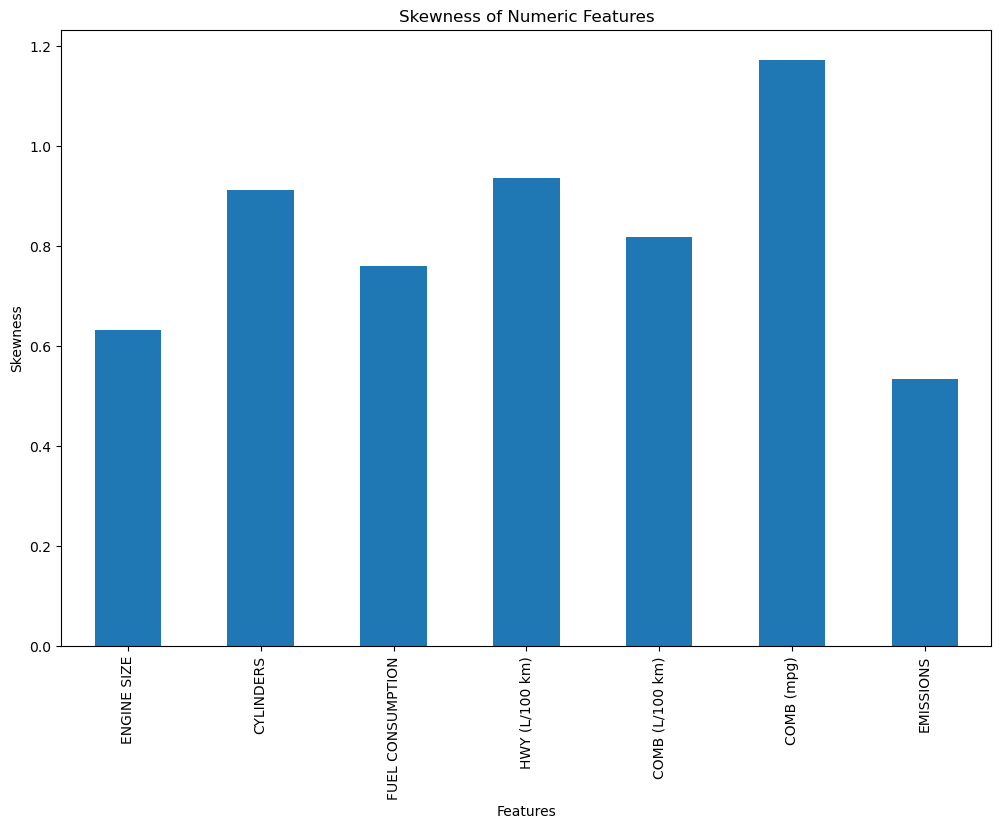

In [20]:
from scipy.stats import skew, kurtosis
# Histograms for numerical features
numerical_columns = ['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'HWY (L/100 km)', 'COMB (L/100 km)', 
                     'COMB (mpg)', 'EMISSIONS']
# Calculate skewness for each numeric column
skewness = df[numerical_columns].skew()
print("Skewness:\n", skewness)

# Visualize skewness using a bar plot
plt.figure(figsize=(12, 8))
skewness.plot(kind='bar')
plt.title('Skewness of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.show()

kurtosis:
 ENGINE SIZE        -0.394957
CYLINDERS           1.198921
FUEL CONSUMPTION    1.105177
HWY (L/100 km)      1.150163
COMB (L/100 km)     1.055264
COMB (mpg)          3.643895
EMISSIONS           0.616002
dtype: float64


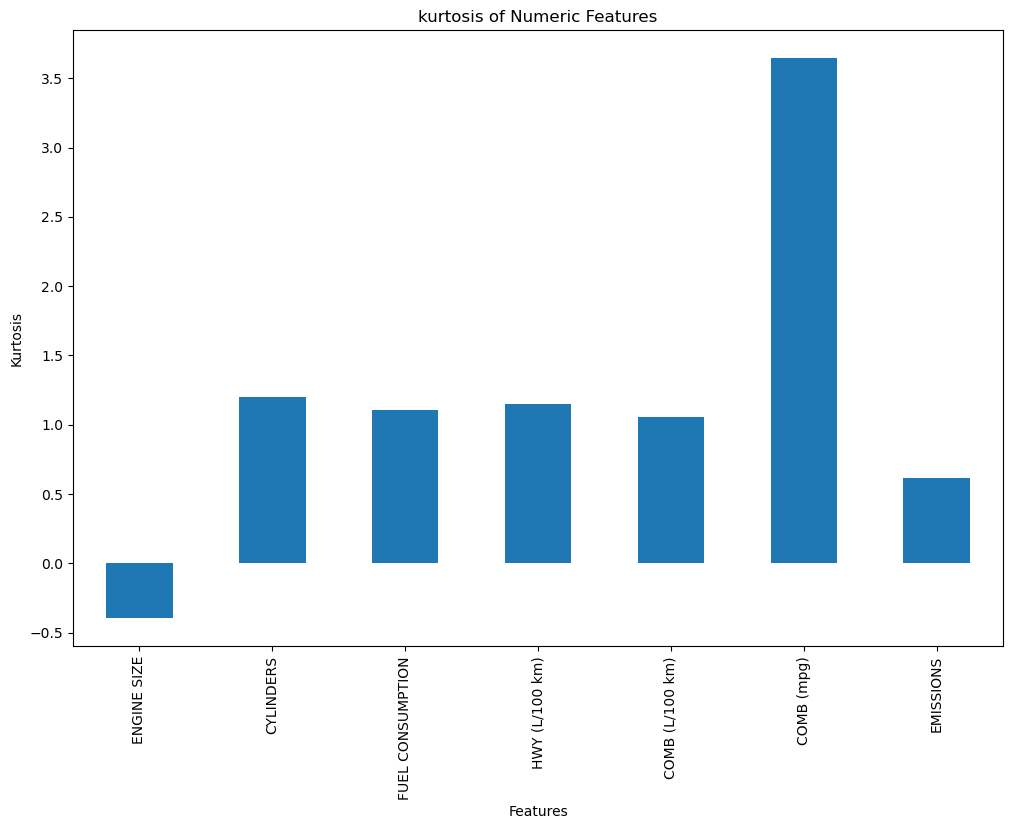

In [21]:
# Calculate kurtosis for each numeric column
kurtosis = df[numerical_columns].kurtosis()
print("kurtosis:\n", kurtosis)
plt.figure(figsize=(12, 8))
kurtosis.plot(kind='bar')
plt.title('kurtosis of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Kurtosis')
plt.show()


# Data Visualization

Fuel consumption versus year

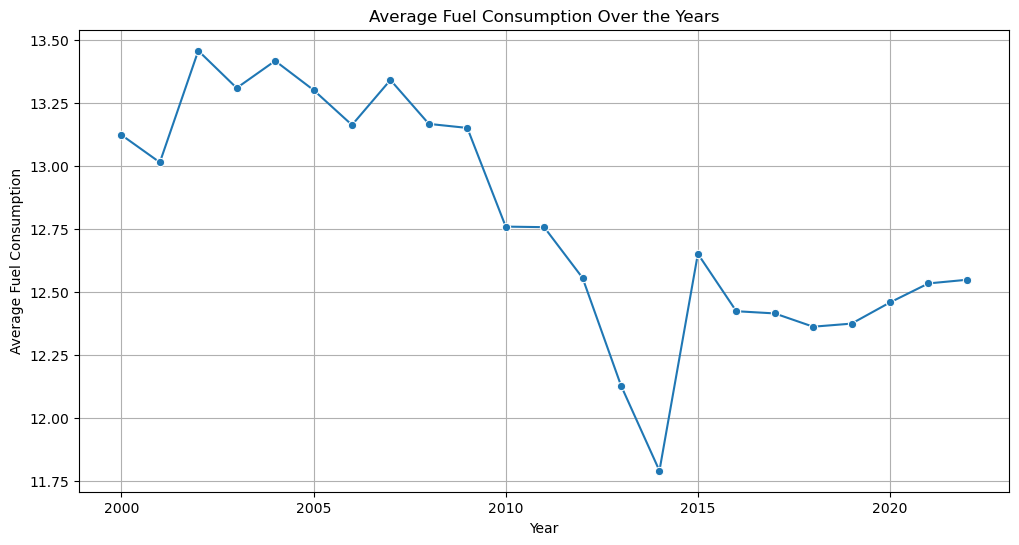

In [61]:
# Calculate average fuel consumption per year
fuel_consumption_year = df.groupby('YEAR')['FUEL CONSUMPTION'].mean().reset_index()

# Display the first few rows
fuel_consumption_year.head()
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for average fuel consumption over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR', y='FUEL CONSUMPTION', data=fuel_consumption_year, marker='o')
plt.title('Average Fuel Consumption Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Fuel Consumption')
plt.grid(True)
plt.show()

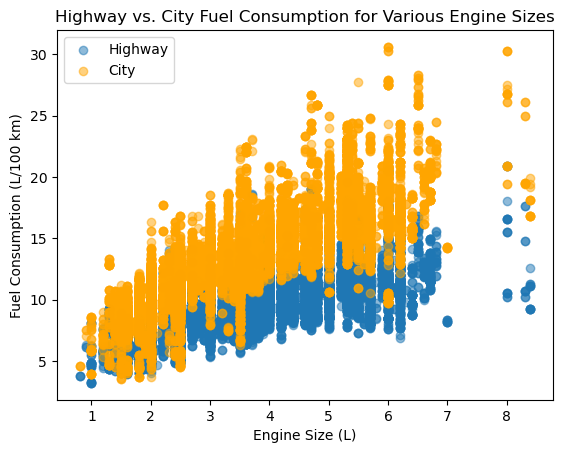

In [71]:
#Highway vs. City Fuel Consumption for Various Engine Sizes
plt.scatter(df['ENGINE SIZE'], df['HWY (L/100 km)'], label='Highway', alpha=0.5)
plt.scatter(df['ENGINE SIZE'], df['FUEL CONSUMPTION'], label='City', alpha=0.5, color='orange')
plt.title('Highway vs. City Fuel Consumption for Various Engine Sizes')
plt.xlabel('Engine Size (L)')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.legend()
plt.show()


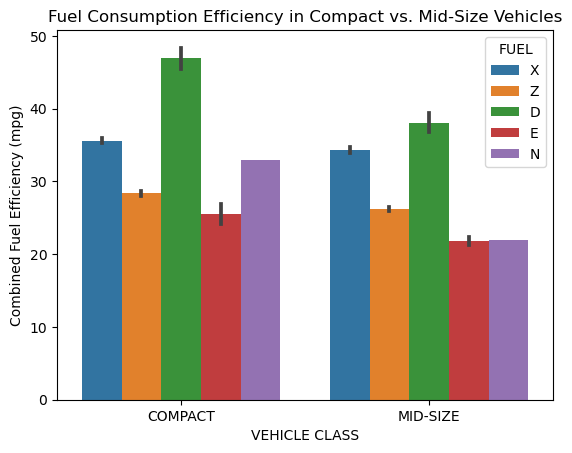

In [72]:
# Fuel Consumption Efficiency in Compact vs. Mid-Size Vehicles
compact_vs_midsize = df[df['VEHICLE CLASS'].isin(['COMPACT', 'MID-SIZE'])]
sns.barplot(data=compact_vs_midsize, x='VEHICLE CLASS', y='COMB (mpg)', hue='FUEL')
plt.title('Fuel Consumption Efficiency in Compact vs. Mid-Size Vehicles')
plt.ylabel('Combined Fuel Efficiency (mpg)')
plt.show()


Fuel Consumption and Emissions by Vehicle Class

In [27]:
# Average fuel consumption and emissions by vehicle class
fuel_emissions_by_class = df.groupby('VEHICLE CLASS')[['FUEL CONSUMPTION', 'EMISSIONS']].mean().reset_index()
fuel_emissions_by_class

,VEHICLE CLASS,FUEL CONSUMPTION,EMISSIONS
0,COMPACT,10.705159,211.036798
1,Compact,10.395519,214.236253
2,FULL-SIZE,13.847053,260.942910
3,Full-size,12.890887,256.136691
4,MID-SIZE,11.525478,223.393478
5,MINICOMPACT,11.762963,231.690932
6,MINIVAN,13.472678,250.147541
7,Mid-size,11.017879,224.771212
8,Minicompact,12.427962,255.796209
9,Minivan,12.571429,251.952381


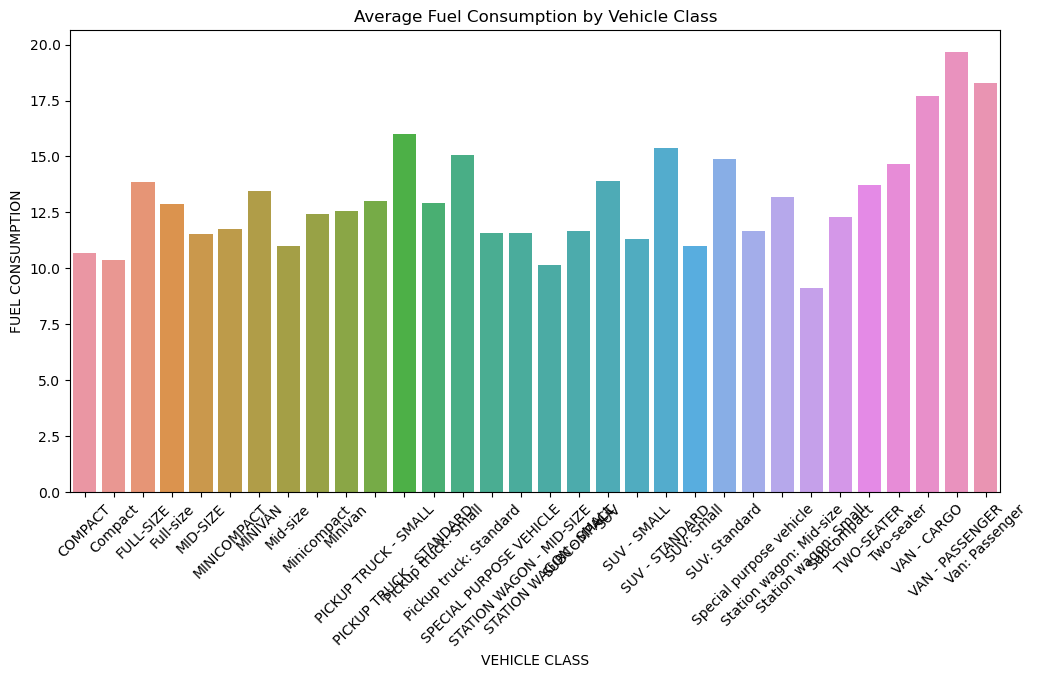

In [28]:
# Bar plot for fuel consumption by vehicle class
plt.figure(figsize=(12, 6))
sns.barplot(data=fuel_emissions_by_class, x='VEHICLE CLASS', y='FUEL CONSUMPTION')
plt.title("Average Fuel Consumption by Vehicle Class")
plt.xticks(rotation=45)
plt.show()

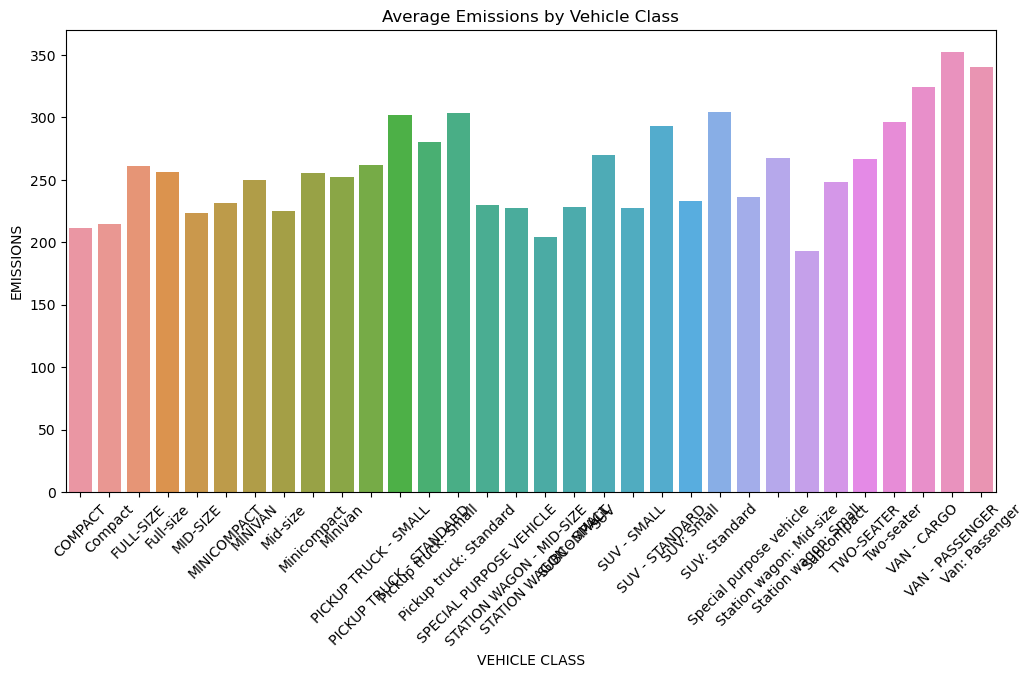

In [29]:
# Bar plot for emissions by vehicle class
plt.figure(figsize=(12, 6))
sns.barplot(data=fuel_emissions_by_class, x='VEHICLE CLASS', y='EMISSIONS')
plt.title("Average Emissions by Vehicle Class")
plt.xticks(rotation=45)
plt.show()

Impact of Engine Size on Fuel Consumption and Emissions

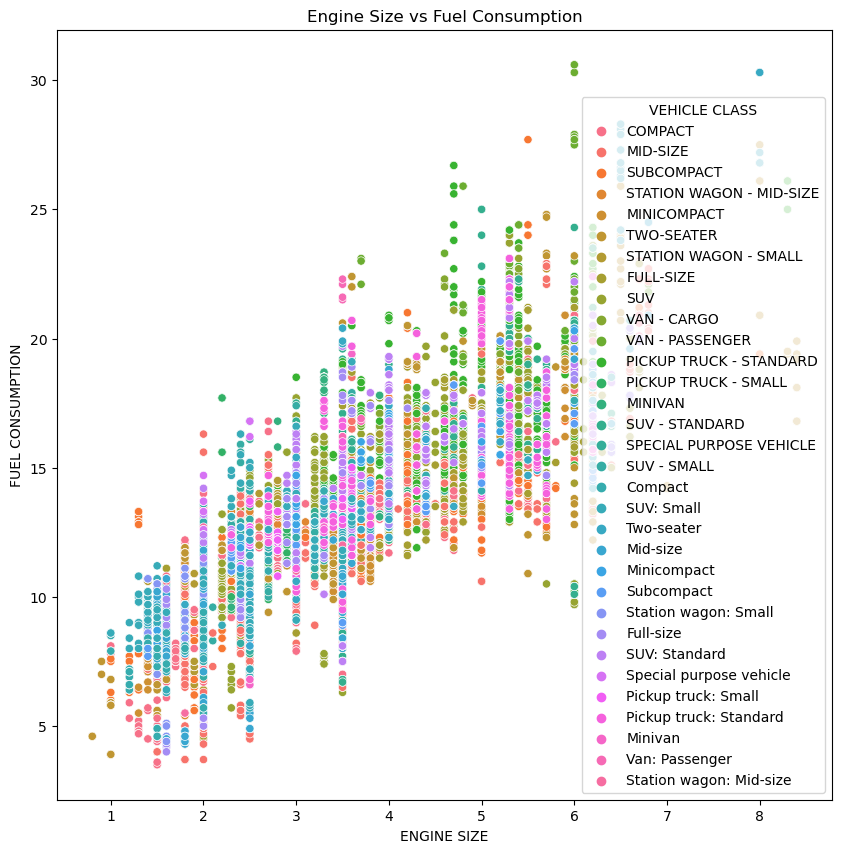

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'Emissions (g/km)')

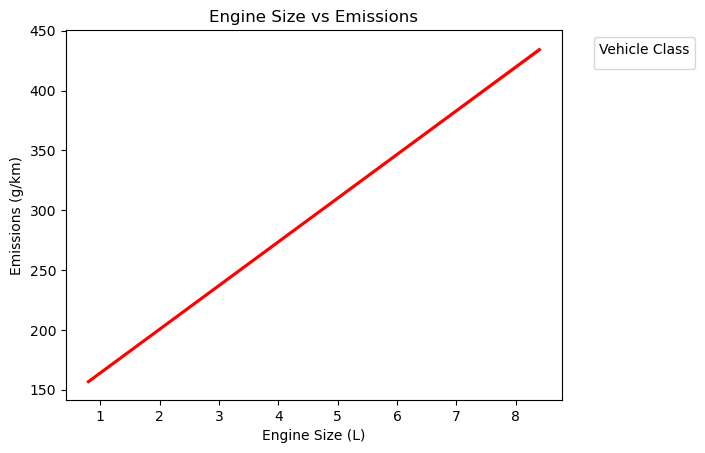

In [30]:
# Scatter plot for engine size vs fuel consumption
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='ENGINE SIZE', y='FUEL CONSUMPTION', hue='VEHICLE CLASS')
plt.title("Engine Size vs Fuel Consumption")
plt.show()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Vehicle Class')

# Adding a regression line to show the trend
sns.regplot(data=df, x='ENGINE SIZE', y='EMISSIONS', scatter=False, color='red')

plt.title("Engine Size vs Emissions")
plt.xlabel("Engine Size (L)")
plt.ylabel("Emissions (g/km)")


The scatter plot illustrates the relationship between engine size and fuel consumption, with different colors representing various vehicle classes. Here's a detailed explanation:

Axes:

X-Axis (Engine Size): Represents the size of the vehicle's engine in liters. It ranges from 0 to 8 liters.
Y-Axis (Fuel Consumption): Indicates the fuel consumption in liters per 100 kilometers (L/100 km). It ranges from 0 to over 30 L/100 km.
Color Coding:

Each vehicle class is represented by a distinct color. The legend on the right side of the plot helps to identify which color corresponds to which vehicle class.
Pattern Observations:

Positive Correlation: There is a clear positive correlation between engine size and fuel consumption. As the engine size increases, fuel consumption also tends to increase.
Clustering: Smaller engine sizes (1-3 liters) are associated with a wide range of fuel consumption values, indicating that other factors (such as vehicle weight and design) also play a role.
Larger Engine Sizes: Vehicles with larger engines (4-8 liters) generally have higher fuel consumption, with fewer exceptions. This is expected as larger engines typically consume more fuel.
Vehicle Class Distribution:

Compact, Subcompact, and Minicompact: These classes (represented by various colors like light blue, light green, and light pink) are mostly clustered towards the lower end of the engine size and fuel consumption spectrum.
SUVs, Vans, and Pickup Trucks: These vehicle classes (represented by darker and bolder colors) tend to be spread across the higher end of both engine size and fuel consumption ranges.
Special Purpose Vehicles: They are scattered throughout, but often appear with larger engine sizes and higher fuel consumption.
Outliers:

There are a few outliers with very high fuel consumption despite relatively smaller engine sizes. This could be due to various factors such as heavy load, poor fuel efficiency, or specific vehicle design.
Overall, the scatter plot effectively visualizes the relationship between engine size and fuel consumption across different vehicle classes, highlighting the expected trend that larger engines generally consume more fuel.








 Transmission Type and Fuel Efficiency

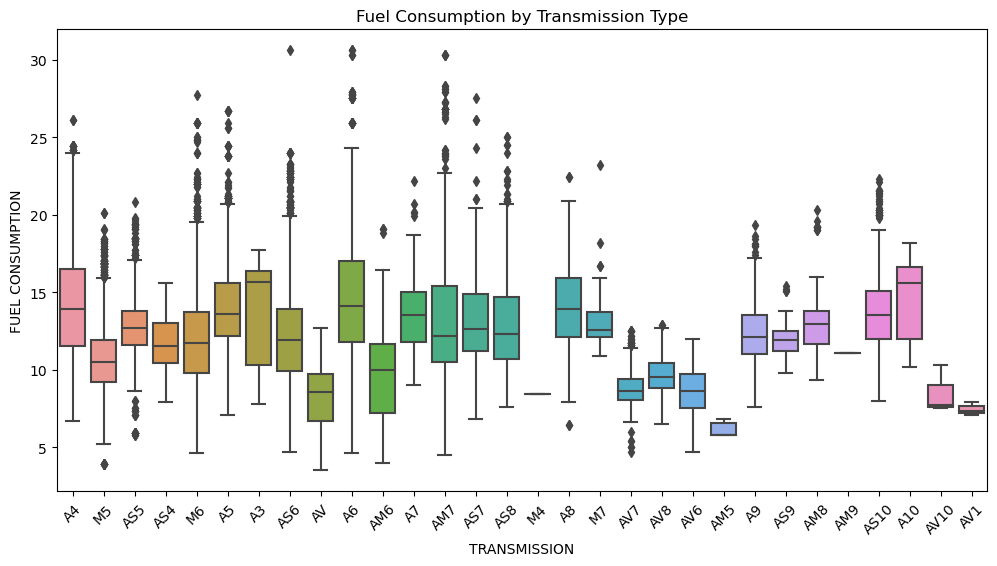

In [31]:
# Box plot for fuel consumption by transmission type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='TRANSMISSION', y='FUEL CONSUMPTION')
plt.title("Fuel Consumption by Transmission Type")
plt.xticks(rotation=45)
plt.show()


The box plot illustrates the distribution of fuel consumption across different transmission types. Here’s a detailed explanation:

Axes:

X-Axis (Transmission): Different types of vehicle transmissions are listed along the x-axis, each represented by a unique identifier (e.g., A4, M5, AS5). These identifiers represent combinations of automatic (A), manual (M), continuously variable (AV), and automated manual (AM) transmissions with the number of gears.
Y-Axis (Fuel Consumption): Fuel consumption in liters per 100 kilometers (L/100 km), ranging from 0 to over 30 L/100 km.
Box Plot Components:

Boxes: Represent the interquartile range (IQR), which is the range between the 25th percentile (Q1) and the 75th percentile (Q3) of the data. The line inside the box represents the median (50th percentile).
Whiskers: Extend from the box to the smallest and largest values within 1.5 times the IQR from Q1 and Q3, respectively.
Outliers: Data points beyond the whiskers are considered outliers and are plotted as individual dots.
Observations:

Variation in Fuel Consumption: The median fuel consumption and the spread (IQR) vary significantly among different transmission types. For instance, A4 and M5 have higher median fuel consumption compared to other types like M6 and AV6.
Outliers: Many transmission types have numerous outliers, indicating that there are vehicles with significantly higher or lower fuel consumption than the majority for those transmission types.
Distribution Spread: Some transmission types, such as M5 and AM9, show a wide range of fuel consumption values, while others, like AV6 and AV10, show a narrower range, indicating more consistent fuel efficiency.
Transmission Types:

Automatic Transmissions (A): Generally show a wider range of fuel consumption values, with several outliers indicating less consistent fuel efficiency across different models.
Manual Transmissions (M): Show varying medians and IQRs, with some like M5 showing higher fuel consumption and others like M6 showing lower consumption.
Automated Manual Transmissions (AM): Typically have a higher median fuel consumption and a wider range of values.
Continuously Variable Transmissions (AV): Show relatively lower and more consistent fuel consumption values, especially types like AV6 and AV10.
Overall, the box plot effectively illustrates the differences in fuel consumption across various transmission types, highlighting the variability within each type and the presence of outliers. This can be useful for understanding how transmission choice impacts fuel efficiency.












Fuel Type and Emissions

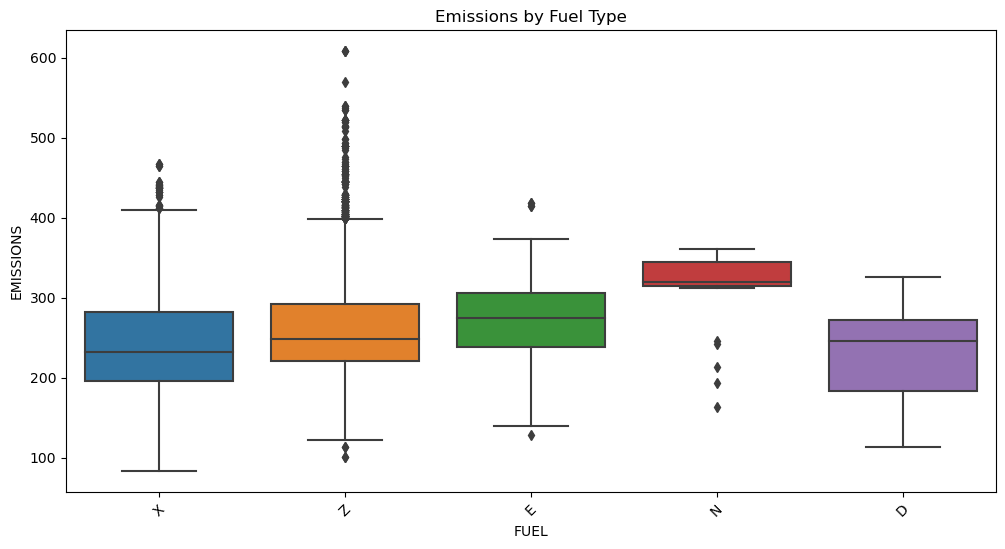

In [32]:
# Box plot for emissions by fuel type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='FUEL', y='EMISSIONS')
plt.title("Emissions by Fuel Type")
plt.xticks(rotation=45)
plt.show()


Each box plot represents the distribution of emissions for a specific fuel type. The box shows the interquartile range (IQR), which contains the middle 50% of the data. The line inside the box indicates the median emission value. The “whiskers” extend to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles. Any points outside this range are considered outliers and are shown as individual dots.
The individual dots outside the whiskers represent outliers, which are emission values significantly higher or lower than the rest of the data for that fuel type

Characteristics of the Most Fuel-Efficient and Least Polluting Vehicles

In [33]:
# Filter for most fuel-efficient vehicles
most_fuel_efficient = df[df['FUEL CONSUMPTION'] <= df['FUEL CONSUMPTION'].quantile(0.1)]
print("Characteristics of Most Fuel-Efficient Vehicles:\n", most_fuel_efficient.describe())




Characteristics of Most Fuel-Efficient Vehicles:
               YEAR  ENGINE SIZE    CYLINDERS  FUEL CONSUMPTION  \
count  2292.000000  2292.000000  2292.000000       2292.000000   
mean   2013.647033     1.841012     4.011780          7.588569   
std       5.424030     0.448814     0.432569          1.159746   
min    2000.000000     0.800000     3.000000          3.500000   
25%    2011.000000     1.600000     4.000000          7.200000   
50%    2014.000000     1.800000     4.000000          7.900000   
75%    2018.000000     2.000000     4.000000          8.400000   
max    2022.000000     3.500000     6.000000          8.800000   

       HWY (L/100 km)  COMB (L/100 km)   COMB (mpg)    EMISSIONS  
count     2292.000000      2292.000000  2292.000000  2292.000000  
mean         5.962653         6.857984    42.082897   160.002182  
std          0.765887         0.896276     6.952299    20.974273  
min          3.200000         3.600000    33.000000    83.000000  
25%          5.60000

In [56]:
# Filter for least polluting vehicles
least_polluting = df[df['EMISSIONS'] <= df['EMISSIONS'].quantile(0.1)]
print("Characteristics of Least Polluting Vehicles:\n", least_polluting.describe())


Characteristics of Least Polluting Vehicles:
               YEAR  ENGINE SIZE    CYLINDERS  FUEL CONSUMPTION  \
count  2278.000000  2278.000000  2278.000000       2278.000000   
mean   2012.625549     1.842888     3.992537          7.688411   
std       5.322271     0.403922     0.335875          1.313183   
min    2000.000000     0.800000     3.000000          3.500000   
25%    2010.000000     1.600000     4.000000          7.200000   
50%    2013.000000     1.800000     4.000000          7.900000   
75%    2016.000000     2.000000     4.000000          8.500000   
max    2022.000000     3.500000     6.000000         13.600000   

       HWY (L/100 km)  COMB (L/100 km)   COMB (mpg)    EMISSIONS  
count     2278.000000      2278.000000  2278.000000  2278.000000  
mean         5.883099         6.874759    42.043898   158.587357  
std          0.698068         0.961567     7.074160    19.649499  
min          3.200000         3.600000    24.000000    83.000000  
25%          5.600000   

C:\Users\kaura\AppData\Local\Temp\ipykernel_9624\1075803907.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='ENGINE SIZE', y='FUEL CONSUMPTION', data=df, ci='sd', marker='o')


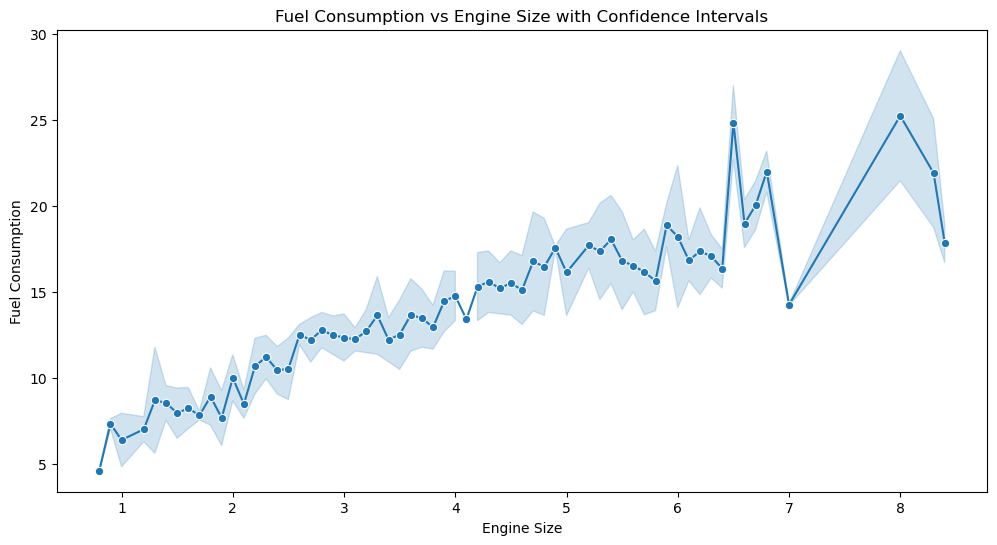

In [58]:
# Line plot with confidence intervals for Fuel Consumption over Engine Size
plt.figure(figsize=(12, 6))

sns.lineplot(x='ENGINE SIZE', y='FUEL CONSUMPTION', data=df, ci='sd', marker='o')
plt.title('Fuel Consumption vs Engine Size with Confidence Intervals')
plt.xlabel('Engine Size')
plt.ylabel('Fuel Consumption')
plt.show()


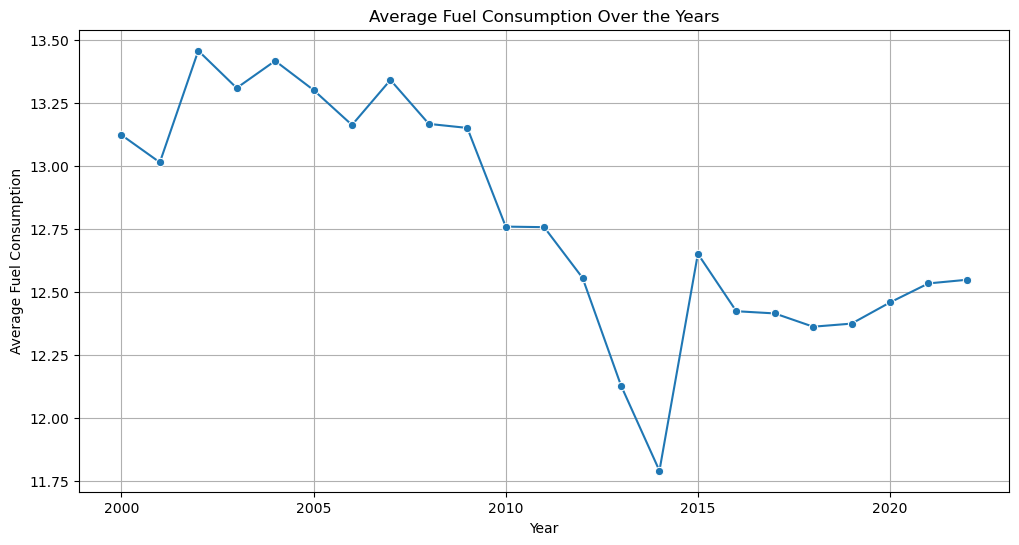

In [60]:
# Calculate average fuel consumption per year
fuel_consumption_year = df.groupby('YEAR')['FUEL CONSUMPTION'].mean().reset_index()

# Display the first few rows
fuel_consumption_year.head()
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot for average fuel consumption over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR', y='FUEL CONSUMPTION', data=fuel_consumption_year, marker='o')
plt.title('Average Fuel Consumption Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Fuel Consumption')
plt.grid(True)
plt.show()


# Linear Regression Analysis

Prepare the Data

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [46]:
# Selecting relevant features
features = df[['ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION']]
target = df['EMISSIONS']

In [47]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


Build the Regression Model

In [48]:
# Creating the Linear Regression model
model = LinearRegression()

In [49]:
# Fitting the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# Predicting on the test data
y_pred = model.predict(X_test)

Evaluate the Model

In [51]:
# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 505.20
R-squared: 0.86


 Visualization

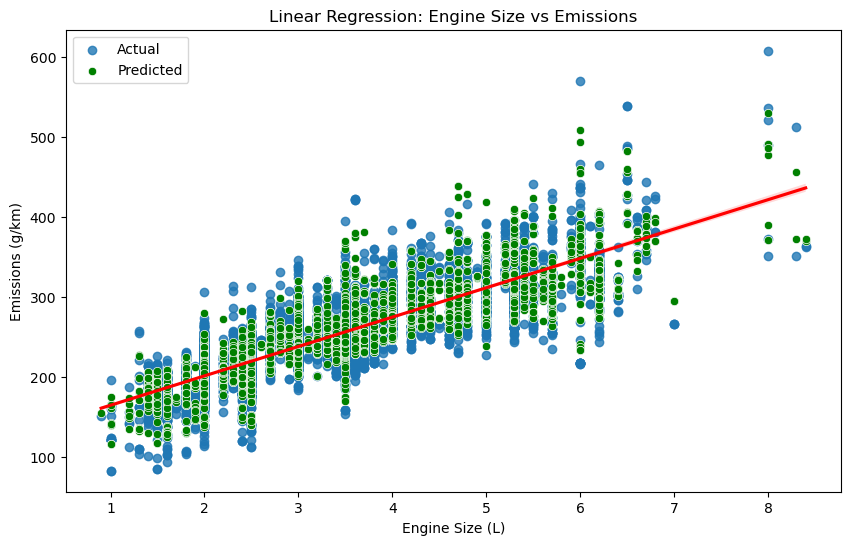

In [52]:
# Visualizing the regression line for one feature (ENGINE SIZE) vs. EMISSIONS
plt.figure(figsize=(10, 6))
sns.regplot(x=X_test['ENGINE SIZE'], y=y_test, line_kws={'color': 'red'}, label='Actual')
sns.scatterplot(x=X_test['ENGINE SIZE'], y=y_pred, color='green', label='Predicted')
plt.title("Linear Regression: Engine Size vs Emissions")
plt.xlabel("Engine Size (L)")
plt.ylabel("Emissions (g/km)")
plt.legend()
plt.show()

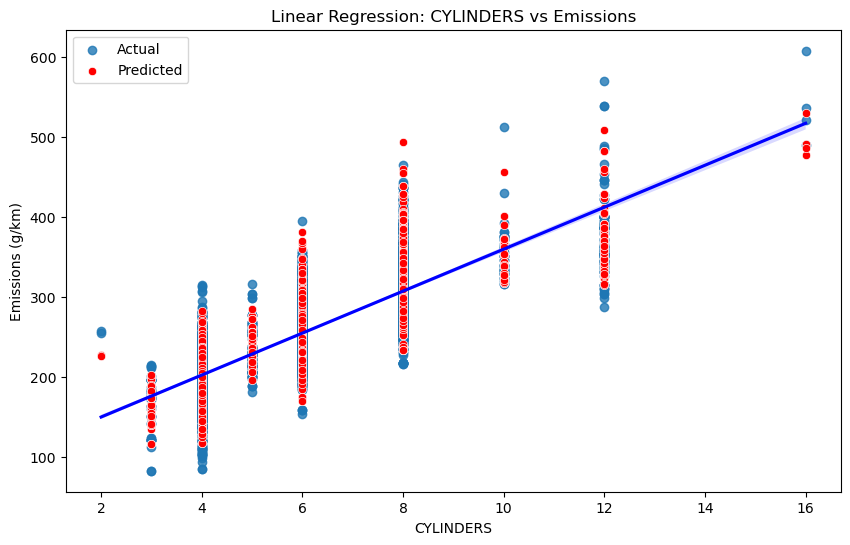

In [53]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_test['CYLINDERS'], y=y_test, line_kws={'color': 'blue'}, label='Actual')
sns.scatterplot(x=X_test['CYLINDERS'], y=y_pred, color='red', label='Predicted')
plt.title("Linear Regression: CYLINDERS vs Emissions")
plt.xlabel("CYLINDERS")
plt.ylabel("Emissions (g/km)")
plt.legend()
plt.show()

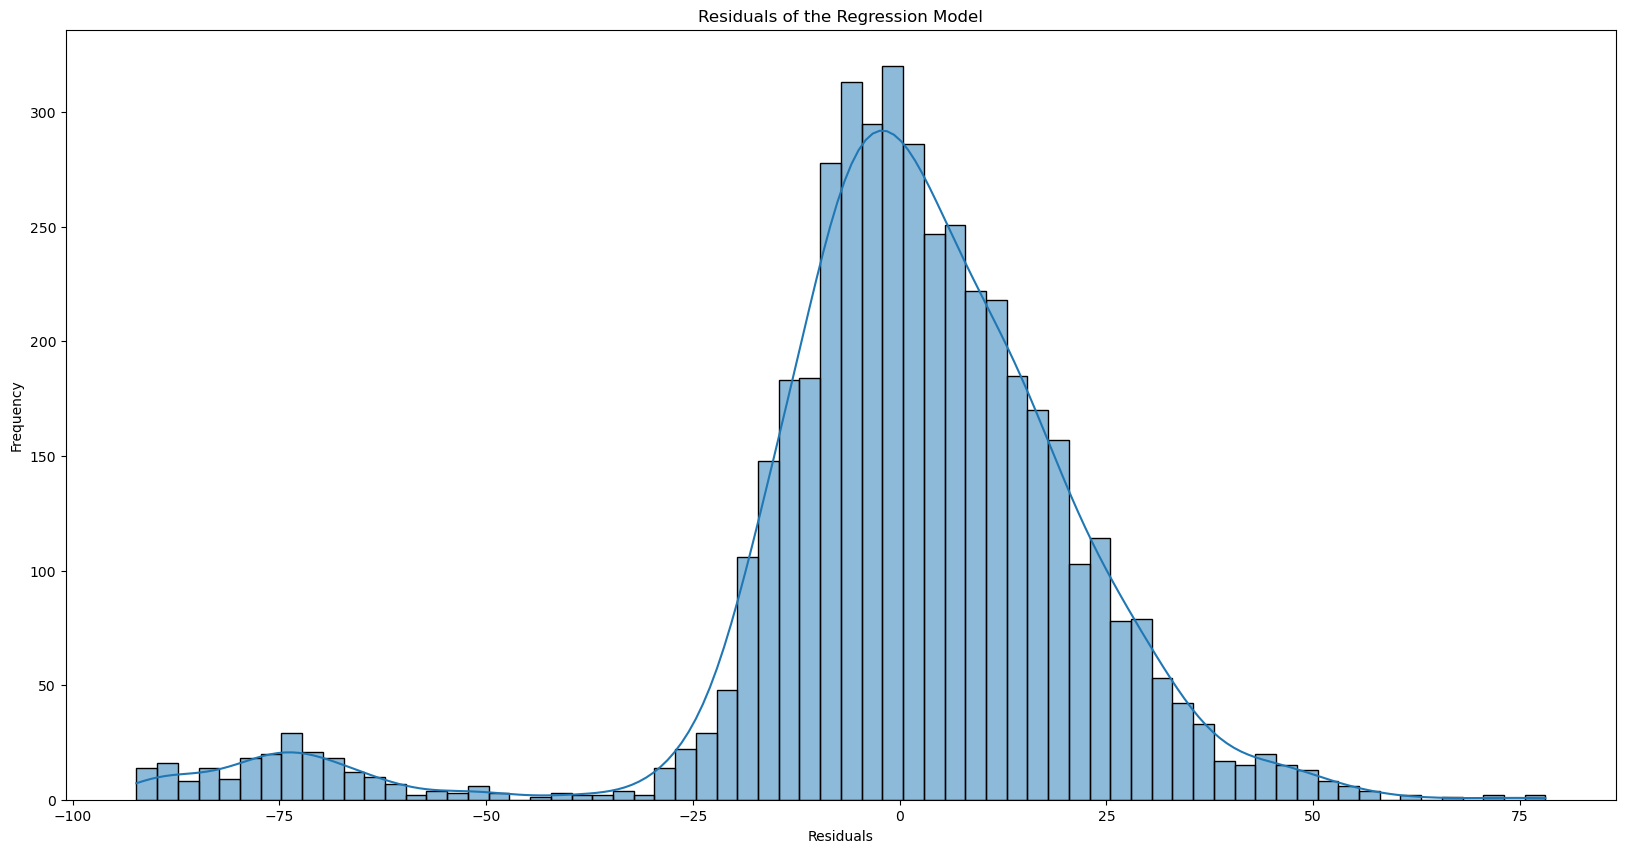

In [54]:
# Visualizing residuals
residuals = y_test - y_pred
plt.figure(figsize=(20, 10))
sns.histplot(residuals, kde=True)
plt.title("Residuals of the Regression Model")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Residuals: These are the differences between the actual values and the predicted values from the regression model. Ideally, residuals should be randomly distributed around zero.
Histogram: This graph shows the frequency of different residual values. The horizontal axis represents the residual values, and the vertical axis represents how often these residuals occur.
Normal Distribution: The histogram appears to be bell-shaped and centered around zero, indicating that the residuals are approximately normally distributed. This is a good sign because it suggests that the regression model fits the data well.
In summary, the histogram shows that the residuals are mostly centered around zero and follow a normal distribution, indicating a good fit for the regression model. 

In [36]:
# Selecting relevant features
features = df[['ENGINE SIZE', 'CYLINDERS']]
target = df['FUEL CONSUMPTION']

In [37]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [38]:
# Creating the Linear Regression model
model = LinearRegression()

In [39]:
# Fitting the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predicting on the test data
y_pred = model.predict(X_test)

In [41]:
# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 3.92
R-squared: 0.69


In [42]:
from sklearn.tree import DecisionTreeRegressor
# Initialize the model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [43]:
# Make predictions on the test data
y_pred = dt_regressor.predict(X_test)


In [44]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 3.322356182858986
R-squared: 0.7366013927322603


C:\Users\kaura\AppData\Local\Temp\ipykernel_9624\3314031834.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')


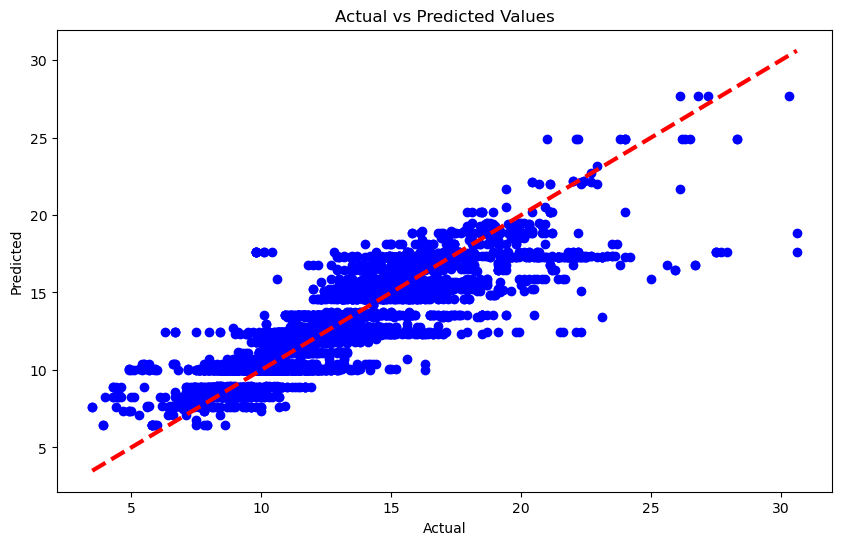

In [45]:
# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()
